# Test Model with Kaggle Dataset

Using a dataset that analyzes the protein expression levels in mice cortex based on their treatment type, a Linear Regression model can accurately predict protein expression levels based on the treatment that was given to the mice.

Dataset found at https://www.kaggle.com/ruslankl/mice-protein-expression

### Import modules

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Processing the Dataset

In [176]:
# read dataset and eliminate all missing values
df = pd.read_csv("Data_Cortex_Nuclear.csv")
df = df.dropna()

# convert strings to numbers
df['Genotype'] = df['Genotype'].map({'Control': 0, 'Ts65Dn': 1})
df['Treatment'] = df['Treatment'].map({'Memantine': 0, 'Saline': 1})
df['Behavior'] = df['Behavior'].map({'C/S': 0, 'S/C': 1})

# create training and testing data:
# 2D matrix with information on genotype, treatmnet and behavior
df_training = df[["Genotype", "Treatment", "Behavior"]].values
# 2D matrix with protein expression levels
df_label = df.drop(columns=["MouseID", "Genotype", "Treatment", "Behavior", "class"]).values

### Visualizing Protein Expression Levels

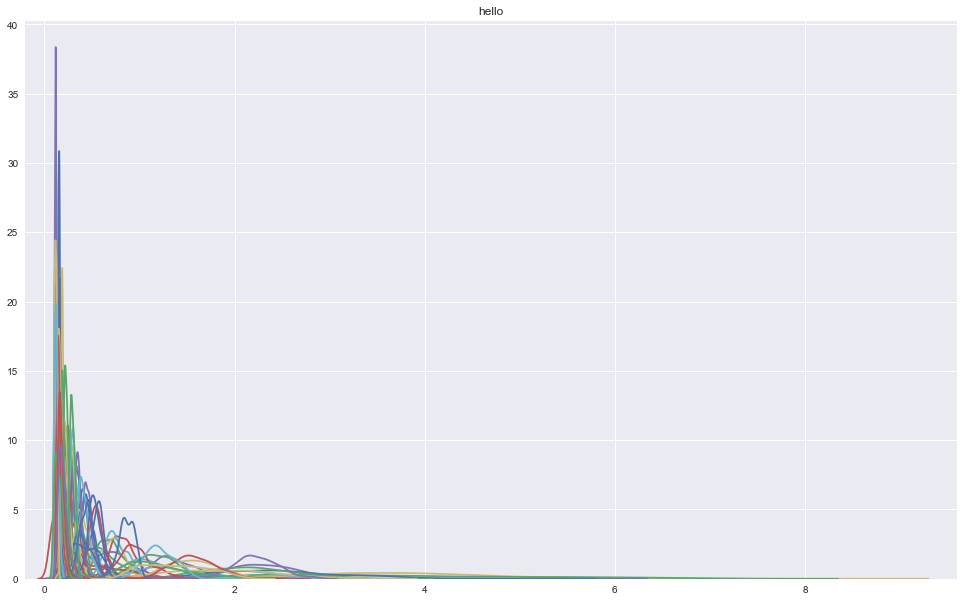

In [175]:
df_mod = df.drop(columns=["MouseID", "Genotype", "Treatment", "Behavior", "class"])
sns.set(rc={'figure.figsize':(16.7,10.27)})
col_list = list(df_mod.columns.values)
for name in col_list:
    sns.distplot(df_mod[[name]].values, hist=False)
plt.title("Protein Expression Levels of all 77 Proteins in")
plt.xlim(-0.2, 9.6)
plt.show()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df_training, df_label)

### Defining Loss Function

In [73]:
def mean_squared_error(model, X_test, y_test):
    """Mean Squared error"""
    predictions = []
    
    for item in X_test:
        predictions.append(model.predict([item])[0])
        
    sum_of_error = 0.0
        
    for pred, result in zip(predictions, y_test):
        sum_of_error += sum(abs(pred-result))
        
    mse = (sum_of_error/(len(predictions)*len(predictions[0])))**2
    
    return mse
    

### Running Linear Regression Model

Predicting the protein expression levels based on the combination of genotype, drug and learning.

In [82]:
clf = LinearRegression()
clf.fit(X_train, y_train)
mse = mean_squared_error(clf, X_test, y_test)

In [83]:
print(f"Loss (mean squared error): {mse}")

Loss (mean squared error): 0.011026427762894595


The loss is 0.01, meaning that the average mistake the model makes is about 0.1 of the actual value of the protein expression.

### Running Linear Regression Model (reverse)

Predicting the combination of genotype, drug and learning based on protein expression levels

In [84]:
clf_reverse = LinearRegression()
clf_reverse.fit(y_train, X_train)
mse = mean_squared_error(clf_reverse, y_test, X_test)

In [121]:
print("Prediction from the Linear Regression model compared to the actual results")
print()

pred = clf_reverse.predict([y_test[0]])
print(f"Prediction: {pred[0]}")
print(f"Actual:     {X_test[0]}")
print()

pred = clf_reverse.predict([y_test[2]])
print(f"Prediction: {pred[0]}")
print(f"Actual:     {X_test[2]}")
print()

pred = clf_reverse.predict([y_test[10]])
print(f"Prediction: {pred[0]}")
print(f"Actual:     {X_test[10]}")
print() 

Prediction from the Linear Regression model compared to the actual results

Prediction: [0.90895621 0.47626436 0.01384573]
Actual:     [1 0 0]

Prediction: [0.08884809 1.15323105 0.01098715]
Actual:     [0 1 0]

Prediction: [0.75249853 0.98774835 0.84988729]
Actual:     [1 1 1]



### Legend

**First index**:  Genotype  {"Control": 0, "Down Syndrome": 1}

**Second index**: Treatment {"Memantine": 0, "Saline": 1}

**Third index**:  Behavior  {"context-shock (learning): 0, "shock-context (not learning)": 1}

For these 3 randomly selected testing samples, the Linear Regression can rather accurately predict the combination of genotype, drug used and the learning behavior that was underwent based on the protein expression levels!

In [116]:
print(f"Loss (mean squared error): {mse}")

Loss (mean squared error): 0.018974216239997274
